In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
dataset_csv_path = Path('data/news/20newsgroup_preprocessed.csv')
dataset_csv_path = Path('data/csob/dataset_till_128.csv')

dataset_csv_path.is_file()

True

In [162]:
df = pd.read_csv(dataset_csv_path, delimiter=',', index_col=0)

## EDA

In [163]:
df.head()

,category,subcategory,text,labels,text_encoded,encoded_len
0,"Sporné transakce PK, ATM",Reklamace - ATM služby,"TEST - změna pro toho, kdo označil ""+ Sledujte...",16,"[2, 5473, 17, 7030, 581, 939, 16, 1311, 12566,...",22
1,Poplatky / Úroky,Poplatky za služby,Snacha paní Fialová-disponentka reklamuje popl...,15,"[2, 1347, 1292, 2386, 11702, 665, 17, 26415, 8...",91
2,Bezhotovostní platební styk (TPS),Provedení,"Dne 19/2/2018 bylo zaúčtováno 1000 Kč, který š...",1,"[2, 1417, 990, 19, 22, 19, 2377, 389, 852, 586...",108
3,Výpisy,Nedoručení,206173249 Disponent reklamuje neobdržení výpis...,17,"[2, 1519, 371, 26957, 388, 26896, 375, 26415, ...",46
4,Založení / Změna / Zrušení (produkt / služba),Založení,"Klientka tvrdí, že mám záznam v bankovním regi...",19,"[2, 7434, 603, 3481, 16, 604, 1554, 10017, 64,...",69


In [153]:
len(df)

73407

In [154]:
df.columns

Index(['category', 'subcategory', 'text', 'labels', 'text_encoded',
       'encoded_len'],
      dtype='object')

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73407 entries, 0 to 92477
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      73407 non-null  object
 1   subcategory   71980 non-null  object
 2   text          73407 non-null  object
 3   labels        73407 non-null  int64 
 4   text_encoded  73407 non-null  object
 5   encoded_len   73407 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.9+ MB


In [171]:
text_column = 'text'
label_column = 'category'

In [172]:
df = df.drop_duplicates(text_column)
df = df[df[text_column].map(lambda _text: isinstance(_text, str) and len(_text.strip()) > 0)]

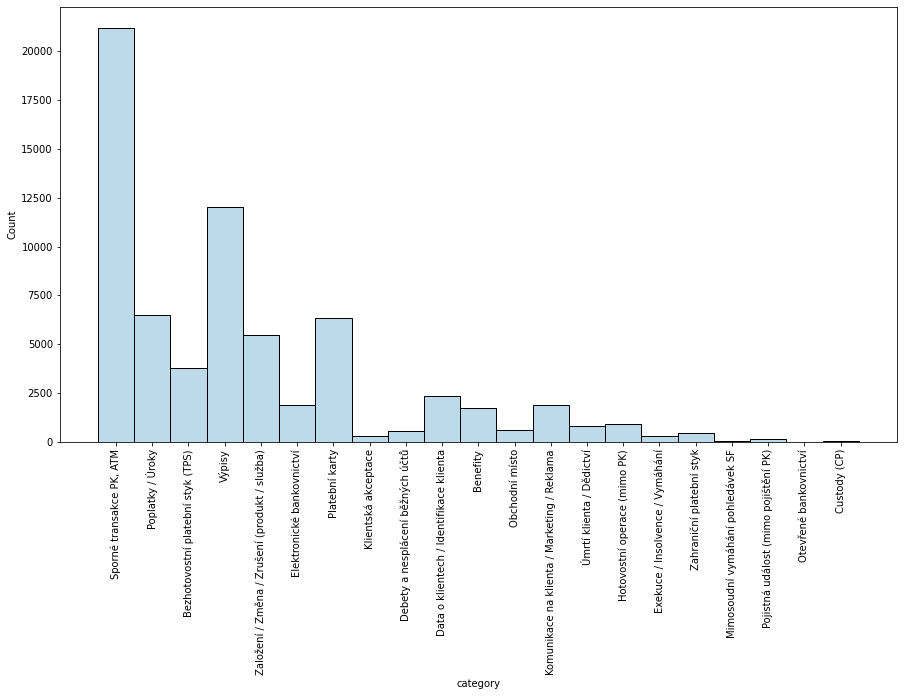

In [173]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df[label_column]);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


In [174]:
selected_categories = [
    'Sporné transakce PK, ATM',
    'Výpisy',
    'Others',
    'Platební karty',
    'Poplatky / Úroky',
    'Založení / Změna / Zrušení (produkt / služba)',
    'Bezhotovostní platební styk (TPS)',
]

In [175]:
sample_df.columns

Index(['category', 'subcategory', 'text', 'labels', 'text_encoded',
       'encoded_len'],
      dtype='object')

In [176]:
df_old = df[df[label_column].map(lambda _label: _label in selected_categories)]
df_change = df[df[label_column].map(lambda _label: _label not in selected_categories)]

df_change[label_column] = ['Others' for _ in range(len(df_change))]

df_old_change = df_old[df_old[label_column] == 'Sporné transakce PK, ATM']
df_old_old = df_old[df_old[label_column] != 'Sporné transakce PK, ATM']

df_old_change[label_column] = df_old_change['subcategory']

new_df = pd.concat([df_old_old, df_old_change, df_change])
sample_df = new_df.sample(len(new_df))

sample_df = sample_df[sample_df[label_column].notna()]
sample_df = sample_df.reset_index(drop=True)
sample_df

/var/folders/v5/tfl8tcs97yb885f785jcdlvc0000gn/T/ipykernel_99278/757716140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_change[label_column] = ['Others' for _ in range(len(df_change))]
/var/folders/v5/tfl8tcs97yb885f785jcdlvc0000gn/T/ipykernel_99278/757716140.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_change[label_column] = df_old_change['subcategory']


,category,subcategory,text,labels,text_encoded,encoded_len
0,Výpisy,Nastavení,"Klient reklamuje výpisy, které jsou doručovány...",17,"[2, 7434, 19031, 612, 29580, 362, 16, 779, 774...",32
1,Reklamace - výběr ČSOB ATM,Reklamace - výběr ČSOB ATM,"Prosím o reklamaci transakce, kterou jsem prov...",16,"[2, 4085, 57, 16005, 605, 25483, 16, 1454, 666...",123
2,Platební karty,Vydání PK,Oblast zájmu Konkrétní problém (reklamace) Pro...,13,"[2, 5155, 5794, 5109, 1472, 12, 16005, 578, 13...",128
3,Výpisy,Nedoručení,Klientka neobdržela výpis k účtu 157882216 za ...,17,"[2, 7434, 603, 3376, 13935, 29580, 53, 14184, ...",25
4,Poplatky / Úroky,Poplatky za služby,"Dobrý den, dnes jsem si chtěla vybrat peníze z...",15,"[2, 3503, 1339, 16, 1376, 666, 637, 3298, 7366...",104
...,...,...,...,...,...,...
66570,Bezhotovostní platební styk (TPS),Provedení,Klientka obdržela 2 platby 4 000 Kč 17. 6. z ú...,1,"[2, 7434, 603, 17561, 334, 22, 20853, 24, 2876...",88
66571,Reklamace - neautorizovaná trx (zneužití PK),Reklamace - neautorizovaná trx (zneužití PK),"Dobrý den, klientka reklamuje pět plateb, viz....",16,"[2, 3503, 1339, 16, 7434, 603, 19031, 612, 189...",28
66572,Založení / Změna / Zrušení (produkt / služba),Změna,Klientka dne 2/2 žádala na ČP o výměnu Vkladní...,19,"[2, 7434, 603, 1417, 22, 19, 22, 17068, 334, 5...",87
66573,Reklamace - neautorizovaná trx (zneužití PK),Reklamace - neautorizovaná trx (zneužití PK),"Dne 18.12. odečtena částka 996,- , kdy k ní kl...",16,"[2, 1417, 1948, 18, 2450, 18, 1492, 6513, 616,...",37


In [177]:
sample_df[label_column].value_counts()

Others                                           12303
Výpisy                                           12030
Poplatky / Úroky                                  6487
Platební karty                                    6334
Reklamace - sporná trx PK u obchodníků            6201
Založení / Změna / Zrušení (produkt / služba)     5483
Reklamace - neautorizovaná trx (zneužití PK)      4804
Bezhotovostní platební styk (TPS)                 3789
Reklamace - vklad ATM                             3111
Reklamace - výběr ČSOB ATM                        2995
Reklamace - neautorizovaná trx  (zneužití PK)     2036
Reklamace - výběr ATM jiných bank                  741
Reklamace - ATM služby                             223
Reklamace – ATM - 3. strany                         38
Name: category, dtype: int64

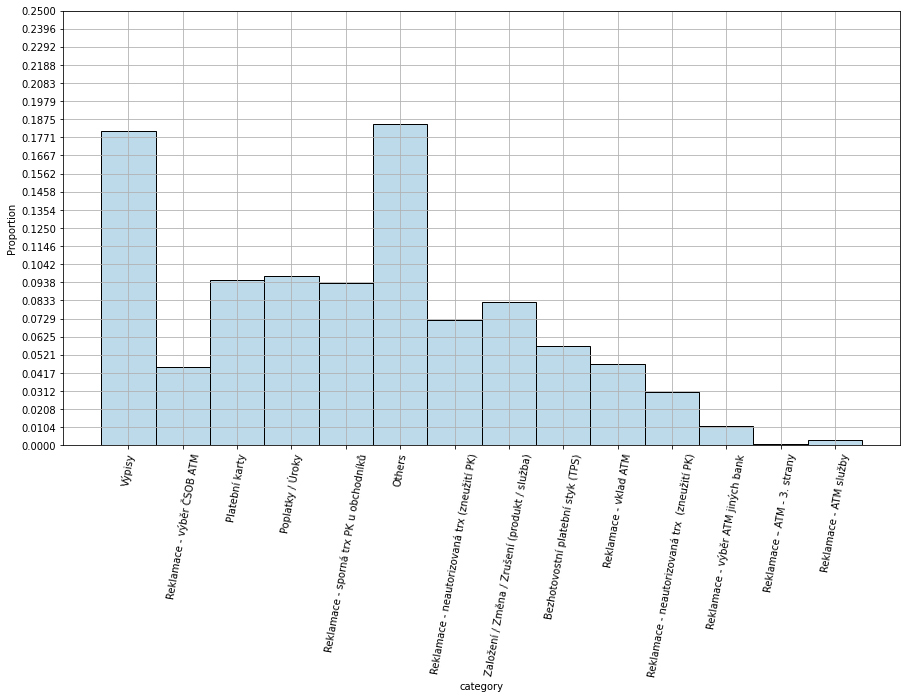

In [178]:
plt.figure(figsize = (15,8))
ax = sns.histplot(sample_df[label_column], stat='proportion');#.value_counts().plot(kind='bar');
plt.xticks(rotation = 80);
plt.grid();
plt.yticks(np.linspace(0, 0.25, 25));


In [179]:
df = sample_df

In [18]:
def reduce_label(label):
    split_label = label.split('.')
    if len(split_label) >= 1:
        return '.'.join(split_label[:1])

df['label_reduced'] = df[label_column].map(reduce_label)

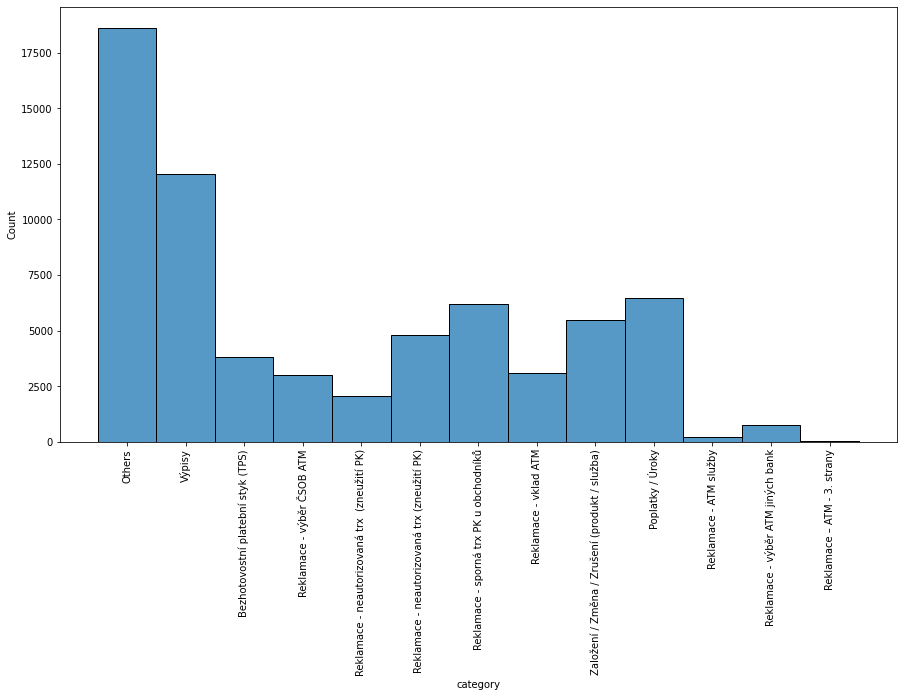

In [19]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df['label_reduced']);#.value_counts().plot(kind='bar');
plt.xticks(rotation = 90);


In [193]:
categories_to_test = df['category'].value_counts()[:8].index.tolist()

In [195]:
df = df[df['category'].isin(categories_to_test)]
df

,category,subcategory,text,labels,text_encoded,encoded_len
0,Výpisy,Nastavení,"Klient reklamuje výpisy, které jsou doručovány...",17,"[2, 7434, 19031, 612, 29580, 362, 16, 779, 774...",32
2,Platební karty,Vydání PK,Oblast zájmu Konkrétní problém (reklamace) Pro...,13,"[2, 5155, 5794, 5109, 1472, 12, 16005, 578, 13...",128
3,Výpisy,Nedoručení,Klientka neobdržela výpis k účtu 157882216 za ...,17,"[2, 7434, 603, 3376, 13935, 29580, 53, 14184, ...",25
4,Poplatky / Úroky,Poplatky za služby,"Dobrý den, dnes jsem si chtěla vybrat peníze z...",15,"[2, 3503, 1339, 16, 1376, 666, 637, 3298, 7366...",104
5,Reklamace - sporná trx PK u obchodníků,Reklamace - sporná trx PK u obchodníků,Klient reklamuje neoprávněné stržení několika ...,16,"[2, 7434, 19031, 612, 20784, 609, 2991, 1381, ...",61
...,...,...,...,...,...,...
66570,Bezhotovostní platební styk (TPS),Provedení,Klientka obdržela 2 platby 4 000 Kč 17. 6. z ú...,1,"[2, 7434, 603, 17561, 334, 22, 20853, 24, 2876...",88
66571,Reklamace - neautorizovaná trx (zneužití PK),Reklamace - neautorizovaná trx (zneužití PK),"Dobrý den, klientka reklamuje pět plateb, viz....",16,"[2, 3503, 1339, 16, 7434, 603, 19031, 612, 189...",28
66572,Založení / Změna / Zrušení (produkt / služba),Změna,Klientka dne 2/2 žádala na ČP o výměnu Vkladní...,19,"[2, 7434, 603, 1417, 22, 19, 22, 17068, 334, 5...",87
66573,Reklamace - neautorizovaná trx (zneužití PK),Reklamace - neautorizovaná trx (zneužití PK),"Dne 18.12. odečtena částka 996,- , kdy k ní kl...",16,"[2, 1417, 1948, 18, 2450, 18, 1492, 6513, 616,...",37


## Duplicites

In [203]:
df.columns

Index(['category', 'subcategory', 'text', 'labels', 'text_encoded',
       'encoded_len'],
      dtype='object')

In [208]:
import re


re.search(r'trans(.)?pk', _text.lower()) is not None

<re.Match object; span=(0, 8), match='trans.pk'>

In [229]:
input_str = 'Dobrý den, v příloze přidány dvě sporné transakce. U každé sporné transakce je více plateb. Jedná se o neoprávněné zneužití dvou karet.'

df_found = df[df['text'] == input_str]
df_found

,category,subcategory,text,labels,text_encoded,encoded_len
10508,Platební karty,Pojištění,"Dobrý den, v příloze přidány dvě sporné transa...",13,"[2, 3503, 1339, 16, 64, 11410, 674, 8669, 713,...",33


In [212]:
_fc = lambda _text: re.search(r'trans(.)?pk', _text.lower()) is not None

transpk_df = df[df['text'].map(_fc)]

In [227]:
len(df), len(df['text'].drop_duplicates())

(57431, 57431)

In [217]:
transpk_df.groupby(['text','category']).sum()

,,labels,encoded_len
text,category,,
"1 TRN - 2 909 CZK, PÚ udělána 2x - 23.8.2018 tentýž den bylo provedeno inkaso 1x 2 909 CZK č.ú. 175739667 trans.pk",Reklamace - neautorizovaná trx (zneužití PK),16,54
"110334749 Duplicitní trans PK v obchodě, viz RL",Reklamace - sporná trx PK u obchodníků,16,22
"13.9.2019 Majitelka účtu dále reklamuje na základě doporučení CC částku 300 Kč za vydání nové karty. RB trans.pk, PK předána na On-line služby k likvidaci.",Reklamace - neautorizovaná trx (zneužití PK),16,45
Prohlášení - trans.pk,Reklamace - sporná trx PK u obchodníků,16,8
Prohlášení trans.pk,Reklamace - sporná trx PK u obchodníků,16,7
Reklamace trans pk - viz příloha,Reklamace - sporná trx PK u obchodníků,16,11
"neaut. trans.PK, viz příloha",Reklamace - neautorizovaná trx (zneužití PK),16,13
"trans pk, PK + tiskopis 773 předávám na oddělení Karet.",Reklamace - neautorizovaná trx (zneužití PK),16,19
trans.PK na poště,Others,7,8


In [214]:
transpk_df['category'].value_counts()

Reklamace - sporná trx PK u obchodníků          20
Reklamace - neautorizovaná trx (zneužití PK)    18
Others                                           5
Platební karty                                   1
Name: category, dtype: int64

## Split datasets

Lengths:   dataset_type  lengths
0        train    40201
1          val     8615
2         test     8615


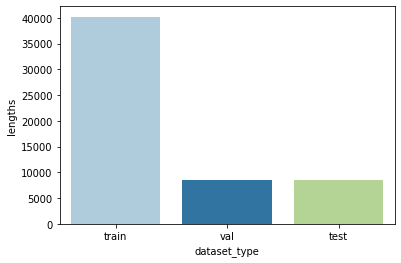

In [196]:
X_train, X_test = train_test_split(
    df,
    test_size=0.3,
    shuffle=True
)

X_val, X_test = train_test_split(
    X_test,
    test_size=0.5,
    shuffle=True
)


lengths_df = pd.DataFrame.from_dict({
    'train': [len(X_train)],
    'val': [len(X_val)],
    'test': [len(X_test)]
})
lengths_df = lengths_df.transpose().reset_index()
lengths_df.columns = ['dataset_type', 'lengths']

print(f'Lengths: {lengths_df}')

sns.barplot(x='dataset_type', y='lengths', data=lengths_df);

In [197]:
X_train[label_column].unique()

array(['Bezhotovostní platební styk (TPS)',
       'Založení / Změna / Zrušení (produkt / služba)', 'Platební karty',
       'Výpisy', 'Reklamace - neautorizovaná trx (zneužití PK)', 'Others',
       'Reklamace - sporná trx PK u obchodníků', 'Poplatky / Úroky'],
      dtype=object)

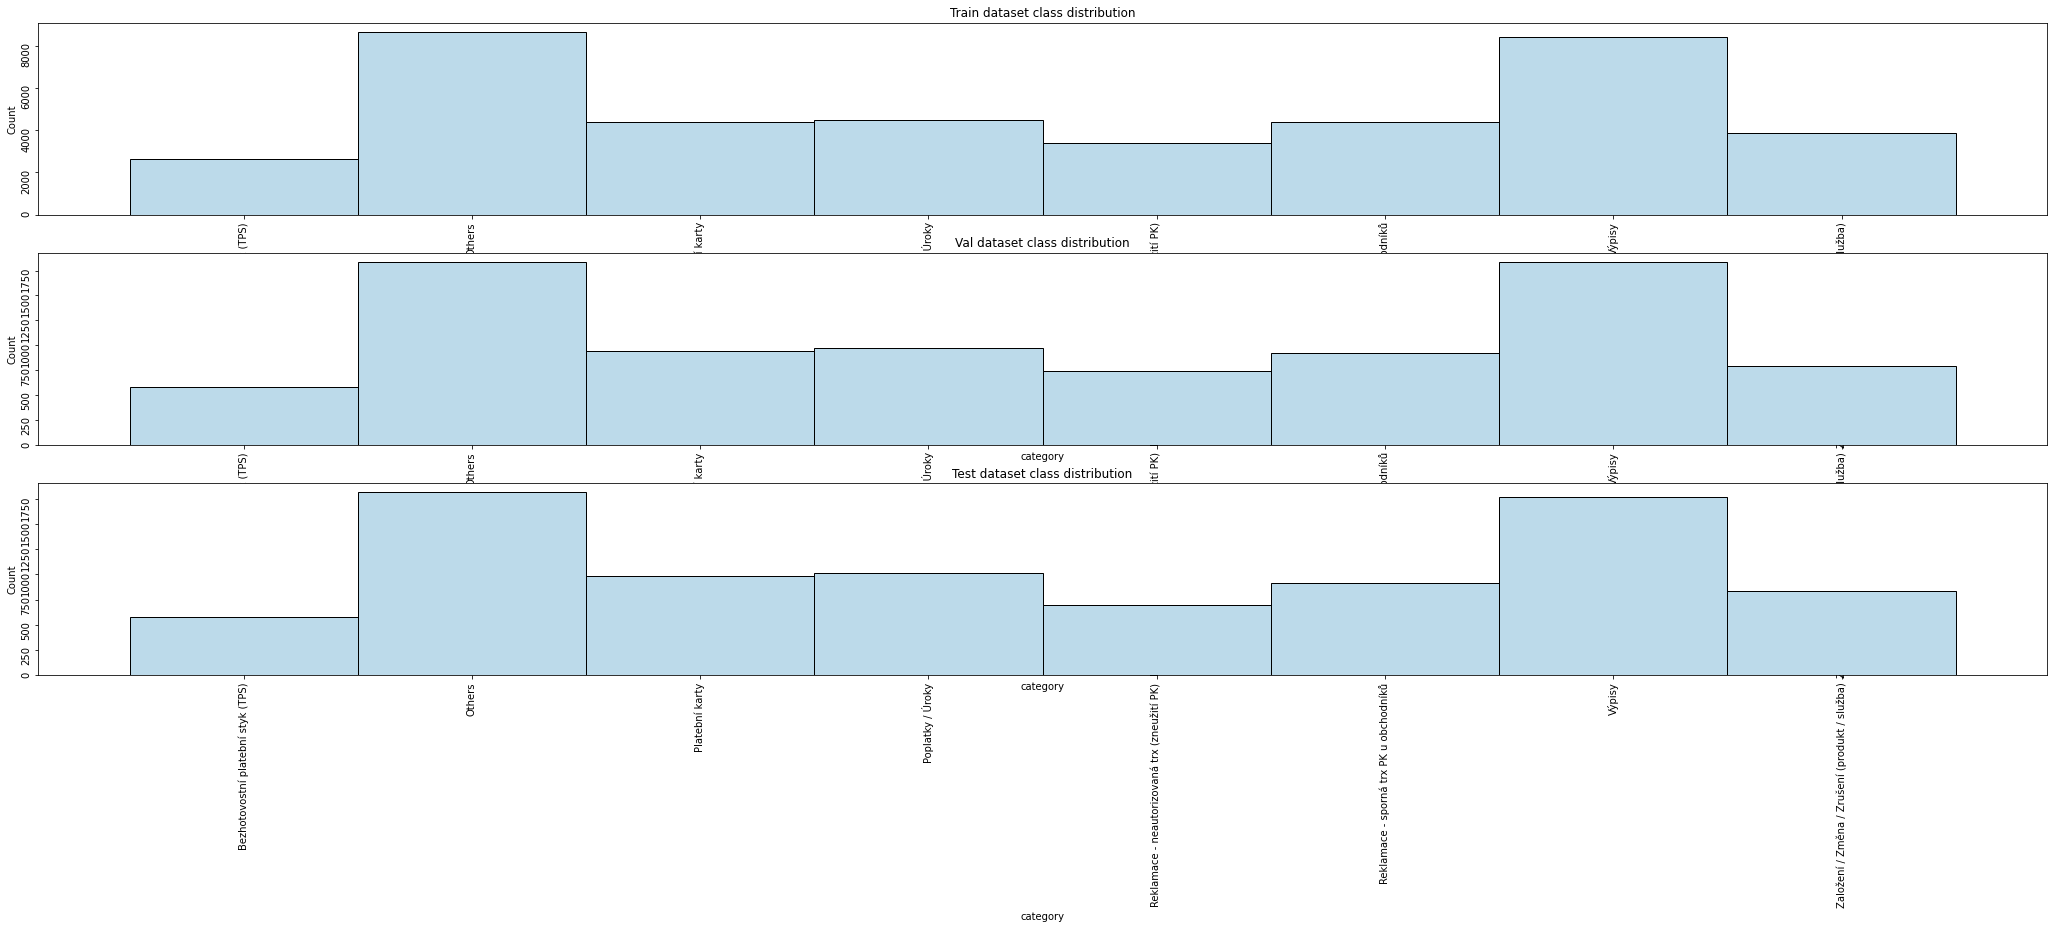

In [200]:
label_column = 'category'

unique_values = sorted(X_train[label_column].unique())

X_train[label_column] = pd.Categorical(X_train[label_column], unique_values)
X_val[label_column] = pd.Categorical(X_val[label_column], unique_values)
X_test[label_column] = pd.Categorical(X_test[label_column], unique_values)

sns.set_palette("Paired")
f, axs = plt.subplots(3, 1, figsize=(36, 12), gridspec_kw=dict(height_ratios=[12, 12, 12]))
sns.histplot(data=X_train[label_column], ax=axs[0])
axs[0].set_title('Train dataset class distribution')
sns.histplot(data=X_val[label_column], ax=axs[1])
axs[1].set_title('Val dataset class distribution')
sns.histplot(data=X_test[label_column], ax=axs[2])
axs[2].set_title('Test dataset class distribution')

axs[0].tick_params(rotation=90)
axs[1].tick_params(rotation=90)
axs[2].tick_params(rotation=90)


#f.tight_layout()


# X_train['airline_sentiment'].value_counts().plot(kind='bar');

In [201]:
X_train = X_train[[label_column, text_column]].reset_index(drop=True)
X_val = X_val[[label_column, text_column]].reset_index(drop=True)
X_test = X_test[[label_column, text_column]].reset_index(drop=True)

save_path = dataset_csv_path.parent


X_train.to_csv(save_path /'train.csv', header=True, index=False)
X_val.to_csv(save_path / 'val.csv', header=True, index=False)
X_test.to_csv(save_path / 'test.csv', header=True, index=False)

In [202]:
X_test

,category,text
0,Platební karty,"prosím o doplnění záznamu data dne 7.9.2018, k..."
1,Výpisy,klientka nedostala papírový výpis za měsíc led...
2,Reklamace - sporná trx PK u obchodníků,Dne 31.1.2019 klient platil v obchodě částku 1...
3,Bezhotovostní platební styk (TPS),"Dobrý den, dne 26.07.2019 klientka u nás na po..."
4,Bezhotovostní platební styk (TPS),"Klientce přišla platba 16.5.2019 1944 kč, ta t..."
...,...,...
8610,Výpisy,Dcera majitele účtu p. Danuše Veselá reklamuje...
8611,Others,Klientka v ČSOB pouze historicky jako zákonný ...
8612,Založení / Změna / Zrušení (produkt / služba),Klientka nevidí v internetovém bankovnictví no...
8613,Bezhotovostní platební styk (TPS),Hovořeno s disponentkou paní N´ěmcovou. byla n...
